            note  timing_frames
0           test              0
1     solo_1+1/4              0
2     solo_1+1/2             16
3     solo_1+3/4             35
4     solo_2+0/1             55
..           ...            ...
99   solo_24+0/1           1734
100  solo_24+1/8           1744
101  solo_24+1/4           1753
102  solo_24+3/8           1763
103  solo_24+1/2           1772

[104 rows x 2 columns]
            note  timing_frames  times_seconds  ground_truth  deviation  \
0           test              0          4.817         4.817      0.000   
1     solo_1+1/4              0          4.817         5.425      0.608   
2     solo_1+1/2             16          5.329         5.947      0.618   
3     solo_1+3/4             35          5.937         6.505      0.568   
4     solo_2+0/1             55          6.577         7.020      0.443   
..           ...            ...            ...           ...        ...   
99   solo_24+0/1           1734         60.305        55.243     -5

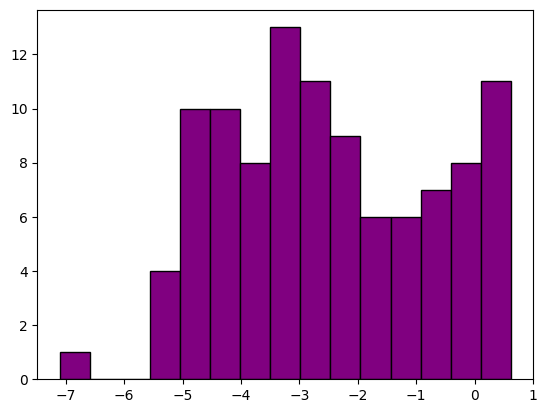

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def main():
    # read in the .times file, i converted to csv for convenience
    timingsDF = pd.read_csv('/Users/kaylaxu/Downloads/schumann_test.csv')
    print(timingsDF)
    analysis(timingsDF)

def analysis(live):
    # display analysis when comparing the solo and times files.

    # convert the live recording to seconds
    live['times_seconds'] = (live[live.columns[1]] * 256.0 / 8000.0)
    #print(live.head())

    # read ground truths
    csvdf = pd.read_csv('/Users/kaylaxu/Downloads/dr_yun_note_timings.csv')

    # add to dataframe
    live['ground_truth'] = csvdf['regular.wav']
    live['deviation'] = live['ground_truth'] - live['times_seconds'] 

    # use numpy to get the five number summary for seconds
    a = live[['deviation']].to_numpy()
    average = np.mean(a)
    stdev = np.std(a)
    median = np.median(a)
    min_idx = live['deviation'].abs().argmin()
    min_dev = live.loc[min_idx, 'deviation']
    max_idx = live['deviation'].abs().argmax()
    max_dev = live.loc[max_idx, 'deviation']

    # use numpy to get five number summary for frames
    live['frame_dev'] = live['deviation'] * 8000.0 / 256.0
    b = live[['frame_dev']].to_numpy()
    average_frames = np.mean(b)
    stdev_frames = np.std(b)
    median_frames = np.median(b)
    min_idx_frames = live['frame_dev'].abs().argmin()
    min_dev_frames = live.loc[min_idx, 'deviation']
    max_idx_frames = live['deviation'].abs().argmax()
    max_dev_frames = live.loc[max_idx, 'deviation']

    # display results and dataframe
    print(live)
    print("The minimum deviation is ", min_idx, " seconds, aka ", min_idx_frames, " frames.")
    print("The maximum deviation is ", max_idx, " seconds, aka ", max_idx_frames, " frames.")
    print("The average is ", average, " seconds, aka ", average_frames, " frames.")
    print("The standard deviation is ", stdev, "seconds, aka ", stdev_frames, " frames.")
    print("The median is ", median, " seconds, aka ", median_frames, " frames.")

    # make a histogram w/ matplotlib
    # swap out first arg (a for seconds, b for frames)
    plt.hist(a, bins = 15, color = 'purple', edgecolor = 'black')
    plt.show

    live.to_csv('out.csv', encoding='utf-8', index=False)


if __name__ == "__main__":
    main()
